In [1]:
#############################################################################################################################################################
#############################################################################################################################################################
######################### PROGRAM TO PERFORM STATISTICAL TESTS FOR EVALUATION OF AN EXPERIMENT - WITH CONTINOUS METRIC OUTCOME ##############################
#############################################################################################################################################################
#############################################################################################################################################################

In [2]:
############################################################################################################################################################
############################################# Read Input Data and review the attributes ####################################################################
############################################################################################################################################################

import pandas as pd
import numpy as np

df = pd.read_csv("../data/cookie_cats.csv")
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [3]:
##################################### Review Sum_Gamerounds distribution by Game Version ##################################################################
df.groupby("version").sum_gamerounds.agg(["count","min","max","mean","median","std"])

,count,min,max,mean,median,std
version,,,,,,
gate_30,44700,0,49854,52.456264,17.0,256.716423
gate_40,45489,0,2640,51.298776,16.0,103.294416


In [4]:
df_30 = df[df.version == "gate_30"]
df_40 = df[df.version == "gate_40"]
stat_total = df[["sum_gamerounds"]].describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99]).T
stat_30 = df_30[["sum_gamerounds"]].describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99]).T
stat_40 = df_40[["sum_gamerounds"]].describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99]).T
summary_stat = pd.concat([stat_total,stat_30,stat_40],keys=["stat_total", "stat_30", "stat_40"])
summary_stat

,,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
stat_total,sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,5.0,16.0,51.0,134.0,221.0,493.00,49854.0
stat_30,sum_gamerounds,44700.0,52.456264,256.716423,0.0,0.0,1.0,1.0,5.0,17.0,50.0,135.0,222.0,493.00,49854.0
stat_40,sum_gamerounds,45489.0,51.298776,103.294416,0.0,0.0,1.0,1.0,5.0,16.0,52.0,134.0,220.0,492.12,2640.0


In [5]:
#############################################################################################################################################################
######################################## Exclude Outliers with greater than 99th percentile #################################################################
#############################################################################################################################################################

df_30_withoutoutliers = df_30[df_30['sum_gamerounds']<=df_30['sum_gamerounds'].quantile(.99)]
df_40_withoutoutliers = df_40[df_40['sum_gamerounds']<=df_40['sum_gamerounds'].quantile(.99)]

df_excloutliers = pd.concat([df_30_withoutoutliers,df_40_withoutoutliers], ignore_index=True)
df_excloutliers

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,1066,gate_30,0,False,False
3,2101,gate_30,0,False,False
4,2179,gate_30,39,True,False
...,...,...,...,...,...
89283,9998733,gate_40,10,True,False
89284,9999441,gate_40,97,True,False
89285,9999479,gate_40,30,False,False
89286,9999768,gate_40,51,True,False


In [6]:
################################# Review Sum_Gamerounds distribution by Game Version - After excluding outliers #######################################################

df_30 = df_excloutliers[df_excloutliers.version == "gate_30"]
df_40 = df_excloutliers[df_excloutliers.version == "gate_40"]
stat_total = df_excloutliers[["sum_gamerounds"]].describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99]).T
stat_30 = df_30[["sum_gamerounds"]].describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99]).T
stat_40 = df_40[["sum_gamerounds"]].describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99]).T
summary_stat = pd.concat([stat_total,stat_30,stat_40],keys=["stat_total", "stat_30", "stat_40"])
summary_stat

,,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
stat_total,sum_gamerounds,89288.0,44.513204,71.782054,0.0,0.0,1.0,1.0,5.0,16.0,49.0,124.0,197.0,366.00,493.0
stat_30,sum_gamerounds,44254.0,44.662494,72.120593,0.0,0.0,1.0,1.0,5.0,16.0,48.0,125.0,198.0,369.47,493.0
stat_40,sum_gamerounds,45034.0,44.366501,71.448313,0.0,0.0,1.0,1.0,5.0,16.0,50.0,124.0,197.0,361.00,492.0


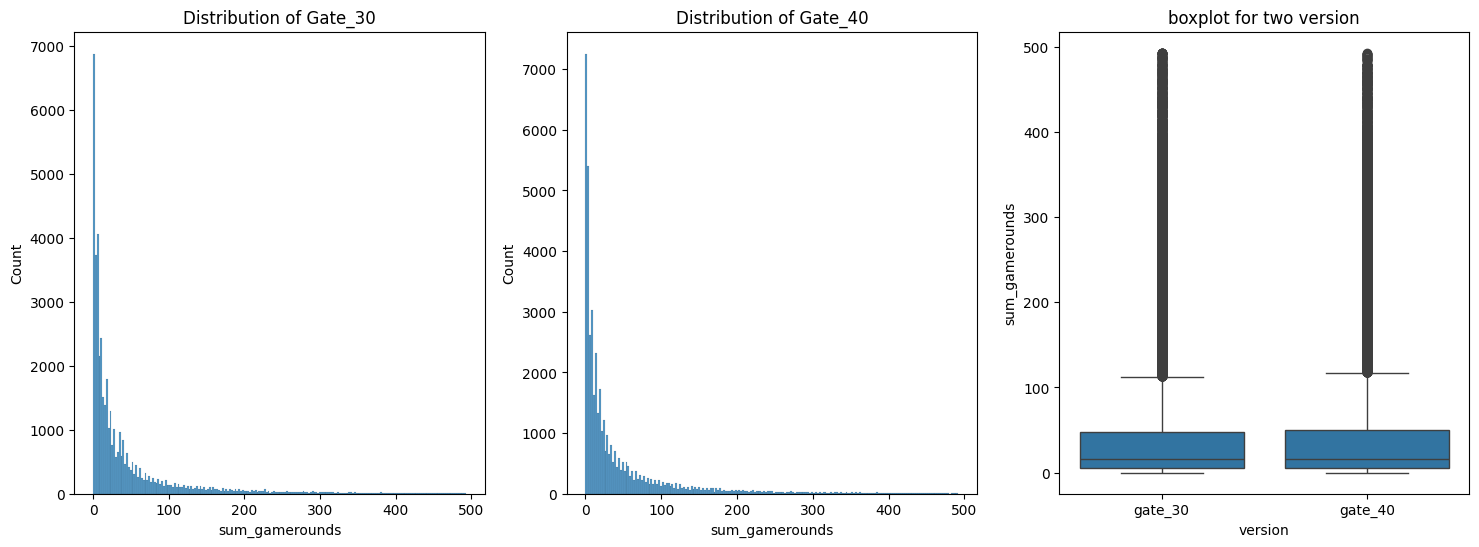

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3)

sns.histplot(x="sum_gamerounds", data=df_excloutliers[df_excloutliers.version=="gate_30"], ax=axes[0])
axes[0].set_title("Distribution of Gate_30")

sns.histplot(x="sum_gamerounds", data=df_excloutliers[df_excloutliers.version=="gate_40"],ax=axes[1])
axes[1].set(title="Distribution of Gate_40")

sns.boxplot(x=df_excloutliers.version, y=df_excloutliers.sum_gamerounds, ax=axes[2])
axes[2].set(title="boxplot for two version")

# Set the figure width and height
fig.set_figwidth(18)
fig.set_figheight(6)
plt.show()

In [8]:
#############################################################################################################################################################
################### Perform Statistical Tests to review if Sum_Gamerounds is significantly different between Game versions 30 and 40 ########################
#############################################################################################################################################################

#Steps:
#Using the Shapiro-Wilk test to check if each group was drawn from a normal distribution.
#If Normal distribution, Using Levene's test to check if k samples have equal variances (Homogeneity of variances).
#If Normal & homogeneity, apply T-test.
#If Normal but non-homogeneity, apply Welch Test
#If Non-Normal, apply Mann Whitney U Test.

In [9]:
########################################### Split the data to two groups ####################################################################################
groupA_version30 = df_excloutliers[df_excloutliers['version'] == "gate_30"]['sum_gamerounds']
groupB_version40 = df_excloutliers[df_excloutliers['version'] == "gate_40"]['sum_gamerounds']


In [10]:
######################################### Perform Shapiro-Wilk test for Normality ###########################################################################
#H0: Distribution is Normal! - p_value > 0.05, do not reject H0
#H1: Distribution is not Normal! - P_value < 0.05, reject H0

from scipy import stats
statistic, p_value = stats.shapiro(groupA_version30)
print("Shapiro-Wilk test for Version30")
print(f"Statistic:{statistic} \nP-Value:{p_value}\n")

statistic, p_value = stats.shapiro(groupB_version40)
print("Shapiro-Wilk test for Version40")
print(f"Statistic:{statistic} \nP-Value:{p_value}\n")

Shapiro-Wilk test for Version30
Statistic:0.6199478056044369 
P-Value:2.925638795206519e-130

Shapiro-Wilk test for Version40
Statistic:0.6247681766790981 
P-Value:2.3365869602293134e-130



C:\Users\madan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44254.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\madan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45034.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
######################################### Perform Levene's test for equality of Variances ########################################################################
#H0: The population variances are equal.
#H1: At least one population variance is different.

statistic, p_value = stats.levene(groupA_version30, groupB_version40)
print("Levene's test for equality of variances")
print(f"Statistic:{statistic} \nP-Value:{p_value}\n")

Levene's test for equality of variances
Statistic:0.0307124308861418 
P-Value:0.8608838903290046



In [12]:
####### As data is not normal distribution (based on above normality test), perform Mann Whitney U Test to check if sum_gamerounds are similar in both version ########
#H0: There is no difference between the two populations from which the samples are drawn. 
#H1: There is a difference between the two populations.

statistic, p_value = stats.mannwhitneyu(groupA_version30, groupB_version40)
print("Mann Whitney U Test to check if there is different in two populations")
print(f"Statistic:{statistic} \nP-Value:{p_value}\n")

#Result:
#As P-value <0.05, reject H0. So, the sum_gamerounds is statistically different between Versions 30 and 40

Mann Whitney U Test to check if there is different in two populations
Statistic:1004149316.0 
P-Value:0.04596818115586124



In [13]:
############################### If incase data was normal, t-test can be performed to check if sum_gamerounds are similar in both version ##########################
#H0: The means of the two groups are equal
#H1: The means of the two groups are not equal 

statistic, p_value = stats.ttest_ind(groupA_version30, groupB_version40, equal_var=True)
print("[Only if Data is normal]: T-test to check if there is different in two populations")
print(f"Statistic:{statistic} \nP-Value:{p_value}\n")

[Only if Data is normal]: T-test to check if there is different in two populations
Statistic:0.6160470926323734 
P-Value:0.5378650096843715

